### Predict Wine Quality with Regularization
The data you’re going to be working with is from the Wine Quality Dataset in the UCI Machine Learning Repository. We’re looking at the red wine data in particular and while the original dataset has a 1-10 rating for each wine, we’ve made it a classification problem with a wine quality of good (>5 rating) or bad (<=5 rating). The goals of this project are to:

1. Implement different logistic regression classifiers
2. Find the best ridge-regularized classifier using hyperparameter tuning
3. Implement a tuned lasso-regularized feature selection method


What we’re working with:

11 input variables (based on physicochemical tests): ‘fixed acidity’, ‘volatile acidity’, ‘citric acid’, ‘residual sugar’,’chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’, ‘density’, ‘pH’, ‘sulphates’ and ‘alcohol’.
An output variable, ‘quality’ (0 for bad and 1 for good)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])

## 1. Data transformation
from sklearn.preprocessing import StandardScaler
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
## 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [5]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty = None)
clf_no_reg.fit(X_train, y_train)

LogisticRegression(penalty=None)

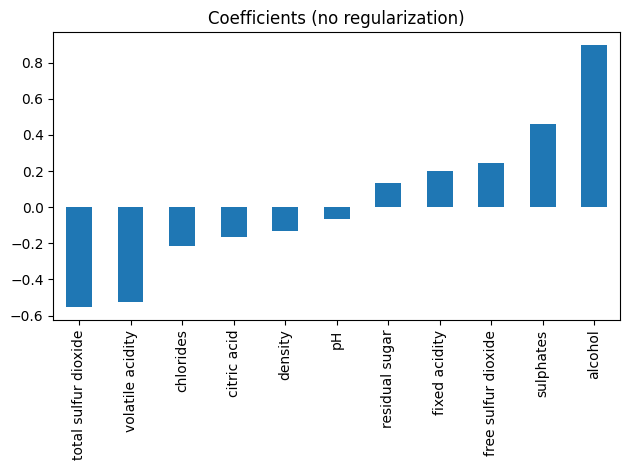

<Figure size 640x480 with 0 Axes>

In [6]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

In [7]:
## 5. Training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)

print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

Training Score 0.7727598566308244
Testing Score 0.7266666666666667


In [8]:
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)

LogisticRegression()

In [9]:
## 7. Ridge Scores
y_pred_train = clf_default.predict(X_train)
y_pred_test = clf_default.predict(X_test)

print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))


Ridge-regularized Training Score 0.7727598566308244
Ridge-regularized Testing Score 0.7266666666666667


In [10]:
## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))

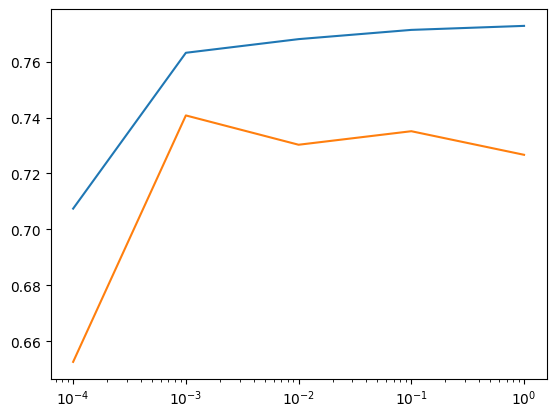

<Figure size 640x480 with 0 Axes>

In [11]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.show()
plt.clf()

In [12]:
## 10. Making a parameter grid for GridSearchCV
C_array  = np.logspace(-4, -2, 100)
#Making a dict to enter as an input to param_grid
tuning_C = {'C':C_array}

In [13]:
## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [14]:
## 12. Optimal C value and the score corresponding to it
print(gs.best_params_, gs.best_score_)

{'C': 0.0020565123083486517} 0.7725370086010586


In [15]:
## 13. Validating the "best classifier"
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(X_train,y_train)
y_pred_best = clf_best.predict(X_test)
print(f1_score(y_test,y_pred_best))

0.735202492211838


In [16]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [17]:
## 15. Optimal C value and corresponding coefficients
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)

Best C value [0.25950242]
Best fit coefficients [[ 0.11646694 -0.55633404 -0.17263233  0.03122709 -0.17325556  0.20054022
  -0.50585308  0.         -0.07043513  0.43222083  0.94103379]]


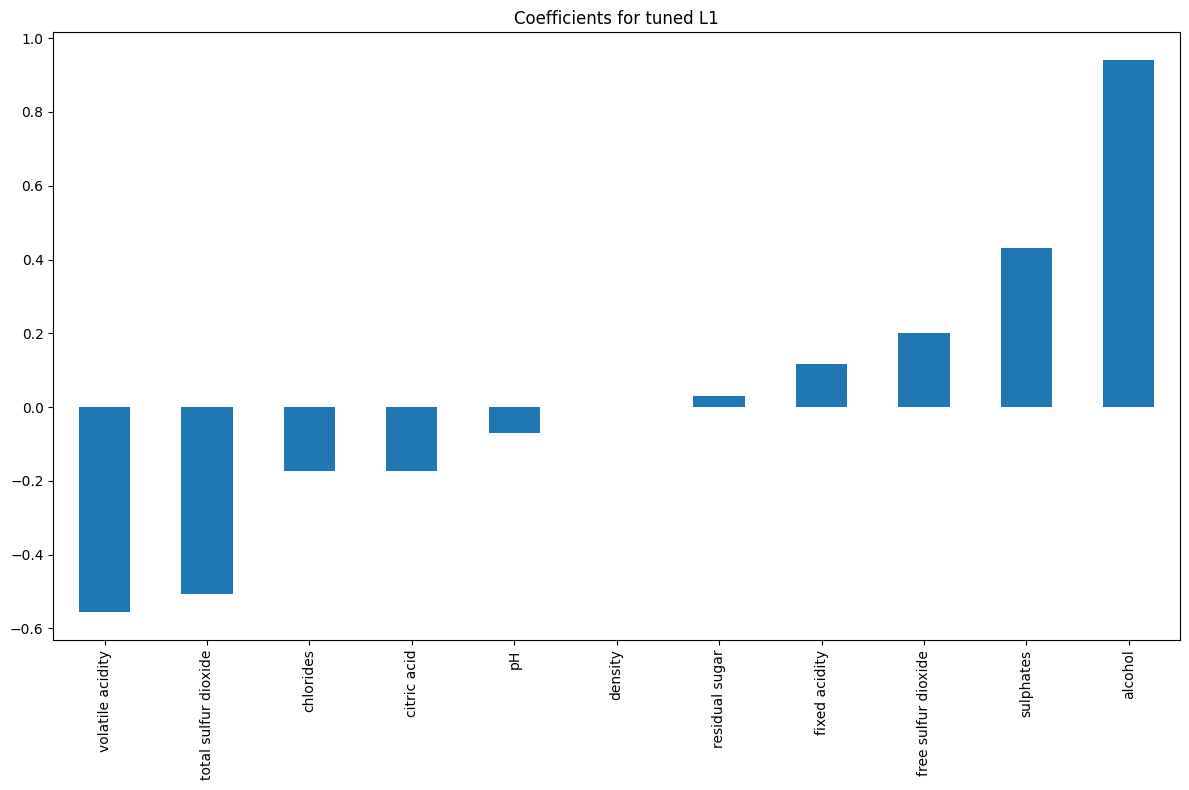

<Figure size 640x480 with 0 Axes>

In [18]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()